In [2]:
import itk
import SimpleITK as sitk

In [3]:
import numpy as np

from skimage.filters.rank import entropy
from skimage.morphology import ball
from skimage.measure import shannon_entropy
from scipy.ndimage import generic_filter

# Load the MRI NIfTI file
import SimpleITK as sitk
img = sitk.ReadImage('d:\Data\clustering_temp\image\MCF_27.nii.gz')
mri_data = sitk.GetArrayFromImage(img)

# Normalize to 8-bit (0-255)
mri_data = (mri_data - np.min(mri_data)) / (np.max(mri_data) - np.min(mri_data)) * 255
mri_data = mri_data.astype(np.uint8)

print("MRI Shape:", mri_data.shape)  # Should be (320, 320, 40)


MRI Shape: (40, 320, 320)


In [4]:
image = mri_data[20,:,:]

error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - Can't parse 'params'. Input argument doesn't provide sequence protocol
>  - Can't parse 'params'. Input argument doesn't provide sequence protocol


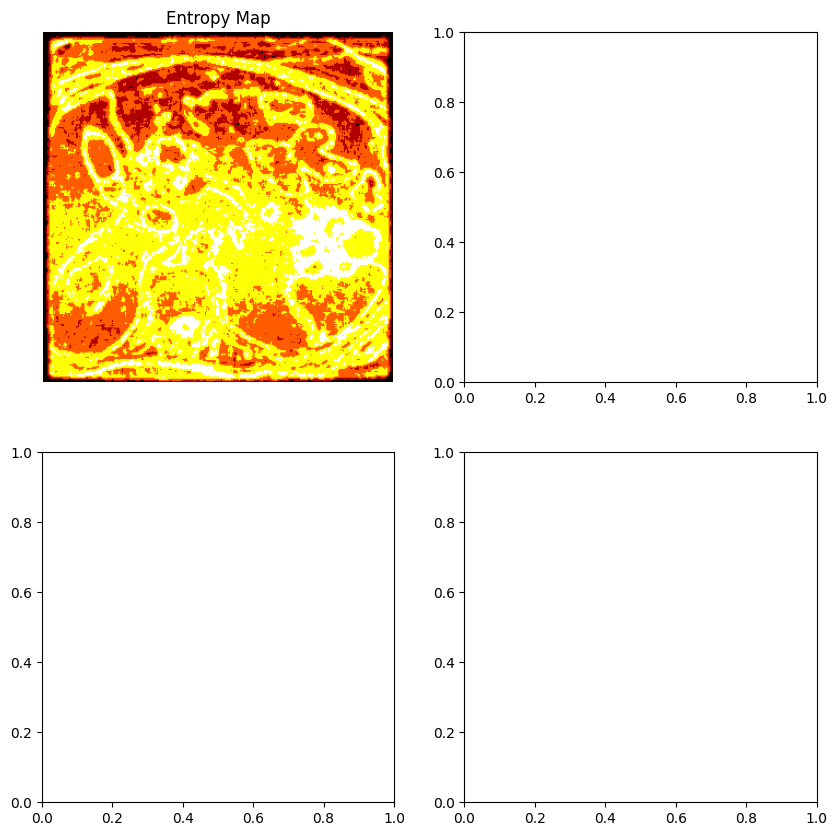

In [ ]:
# Adjusted approach using scipy's entropy function instead of skimage's deprecated entropy function
import numpy as np
import cv2
from scipy.stats import entropy
from scipy.ndimage import generic_filter
import matplotlib.pyplot as plt



# Normalize the image (0-255)
image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
image = image.astype(np.uint8)

# Compute entropy using a local window approach
def entropy_local(window):
    """Compute Shannon entropy in a local window."""
    window = window.reshape(-1)  # Flatten the window
    hist, _ = np.histogram(window, bins=256, range=(0, 255), density=True)
    hist = hist[hist > 0]  # Remove zero values to avoid log(0)
    return entropy(hist, base=2)

# Define window size
window_size = (5, 5)

# Compute entropy map
entropy_map = generic_filter(image, entropy_local, size=window_size, mode='constant')

# Function to compute Homogeneity, ASM, and Max Probability
def compute_texture_features(window):
    """Compute texture features within a 2D local window."""
    window = window.reshape(-1)  # Flatten the window
    if len(np.unique(window)) == 1:  # If all values are the same, return zero
        return [0, 0, 0]

    hist, _ = np.histogram(window, bins=256, range=(0, 255), density=True)

    homogeneity = np.sum(hist / (1 + np.arange(len(hist))))
    ASM = np.sum(hist ** 2)
    max_prob = np.max(hist)

    return [homogeneity, ASM, max_prob]

# Compute texture feature maps
# feature_maps = generic_filter(image, compute_texture_features, size=window_size, mode='constant')

# Extract feature maps
# homogeneity_map = feature_maps[..., 0]
# ASM_map = feature_maps[..., 1]
# max_prob_map = feature_maps[..., 2]

# Display Results
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(entropy_map, cmap='hot')
axs[0, 0].set_title("Entropy Map")
axs[0, 0].axis('off')

# axs[0, 1].imshow(homogeneity_map, cmap='hot')
# axs[0, 1].set_title("Homogeneity Map")
# axs[0, 1].axis('off')

# axs[1, 0].imshow(ASM_map, cmap='hot')
# axs[1, 0].set_title("ASM (Energy) Map")
# axs[1, 0].axis('off')

# axs[1, 1].imshow(max_prob_map, cmap='hot')
# axs[1, 1].set_title("Max Probability Map")
# axs[1, 1].axis('off')

# plt.show()

# Save maps for further use

# cv2.imwrite("./homogeneity_map.png", (homogeneity_map / np.max(homogeneity_map) * 255).astype(np.uint8))
# cv2.imwrite("./ASM_map.png", (ASM_map / np.max(ASM_map) * 255).astype(np.uint8))
# cv2.imwrite("./max_prob_map.png", (max_prob_map / np.max(max_prob_map) * 255).astype(np.uint8))


In [12]:
cv2.imwrite(r"d:\Data\clustering_temp\maps\entropy_map.png", (entropy_map / np.max(entropy_map) * 255).astype(np.uint8))


True